In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creation of a Machine Learning Model that explains the chances of survival for any given Titanic passenger 

In [2]:
#import of the titanic dataset
data = sns.load_dataset('titanic')

In [3]:
#copy of the data to work on a new dataframe
df = data.copy()

In [4]:
#first look at the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#how much data do we have
df.shape

(891, 15)

In [6]:
#further informations about each value
df.info()

#except from deck, not a lot of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
#deletion of the redondancies
df = df.drop(['class','embarked','who','deck','alive'], axis = 1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Broad Analysis of the Values

In [9]:
#What percentage of the passengers survived (target value)
df.value_counts('survived')/df.shape[0]

#Problem of balance between the two categories, to keep in mind for later

survived
0    0.616162
1    0.383838
dtype: float64

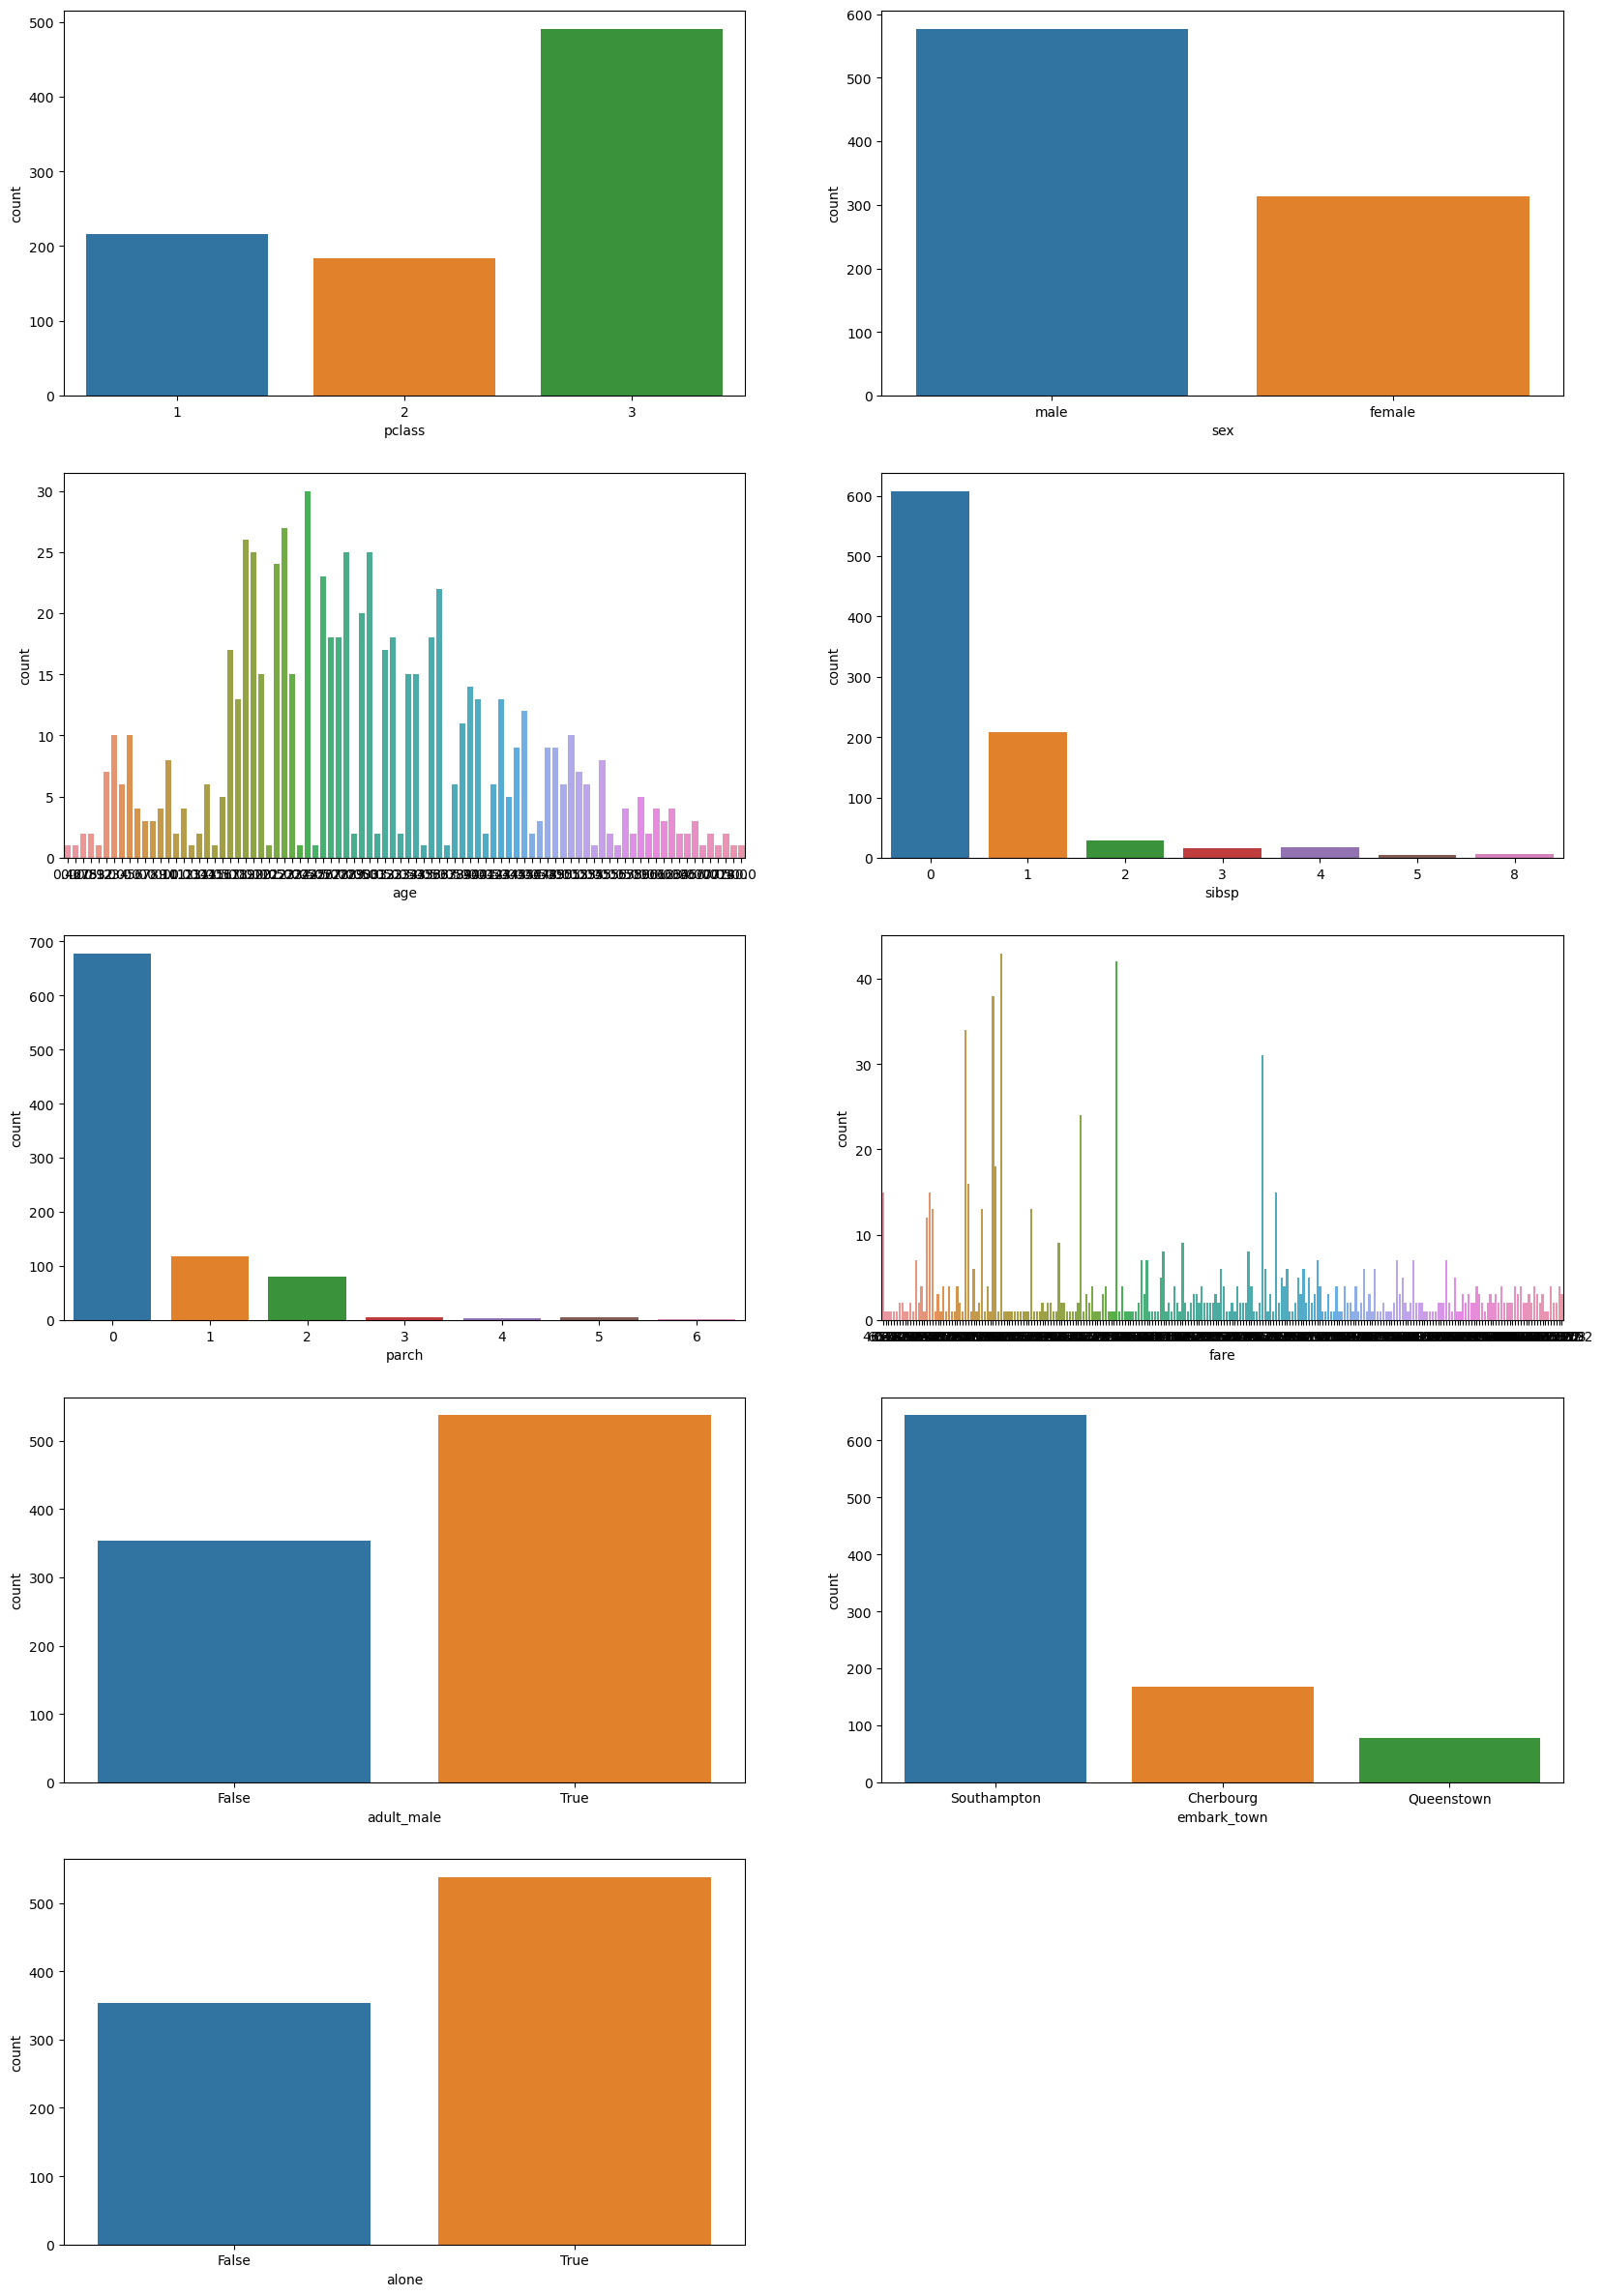

In [10]:
plt.figure(figsize=(20,30))
for i, col in zip(range(1, df.shape[1]), df.loc[:, df.columns != 'survived']):
    plt.subplot(5, 2, i)
    sns.countplot(x = col, data = df )
    
#overview of the data shows that the most represented categories on the boat are: Adult Male, in 3rd Class, alone,
#middle aged, embarked in Southampton

<Figure size 640x480 with 0 Axes>

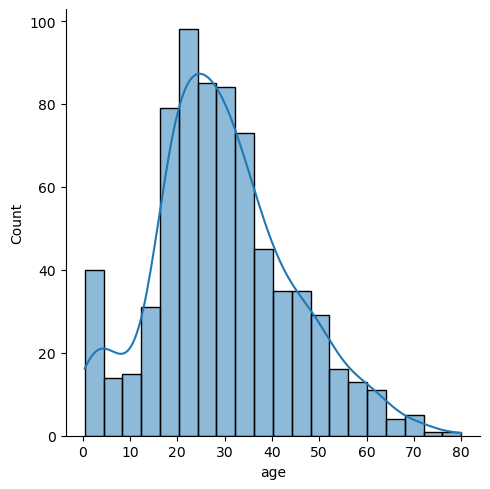

<Figure size 640x480 with 0 Axes>

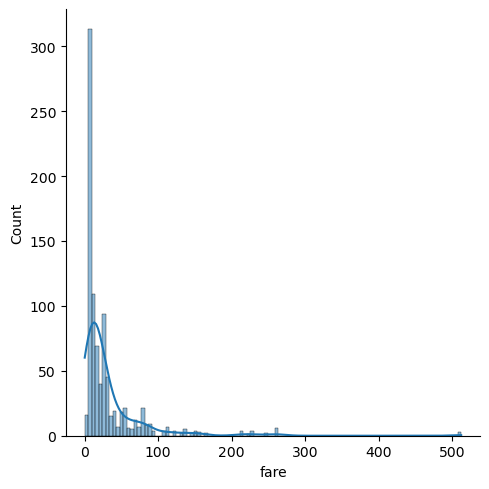

In [11]:
#age and fare are not very clear to read
#use of a distribution plot on those two values

for col in df.select_dtypes(float):
    plt.figure()
    sns.displot(df[col], kde=True)


#### Relations between the target value (survived) and the other values

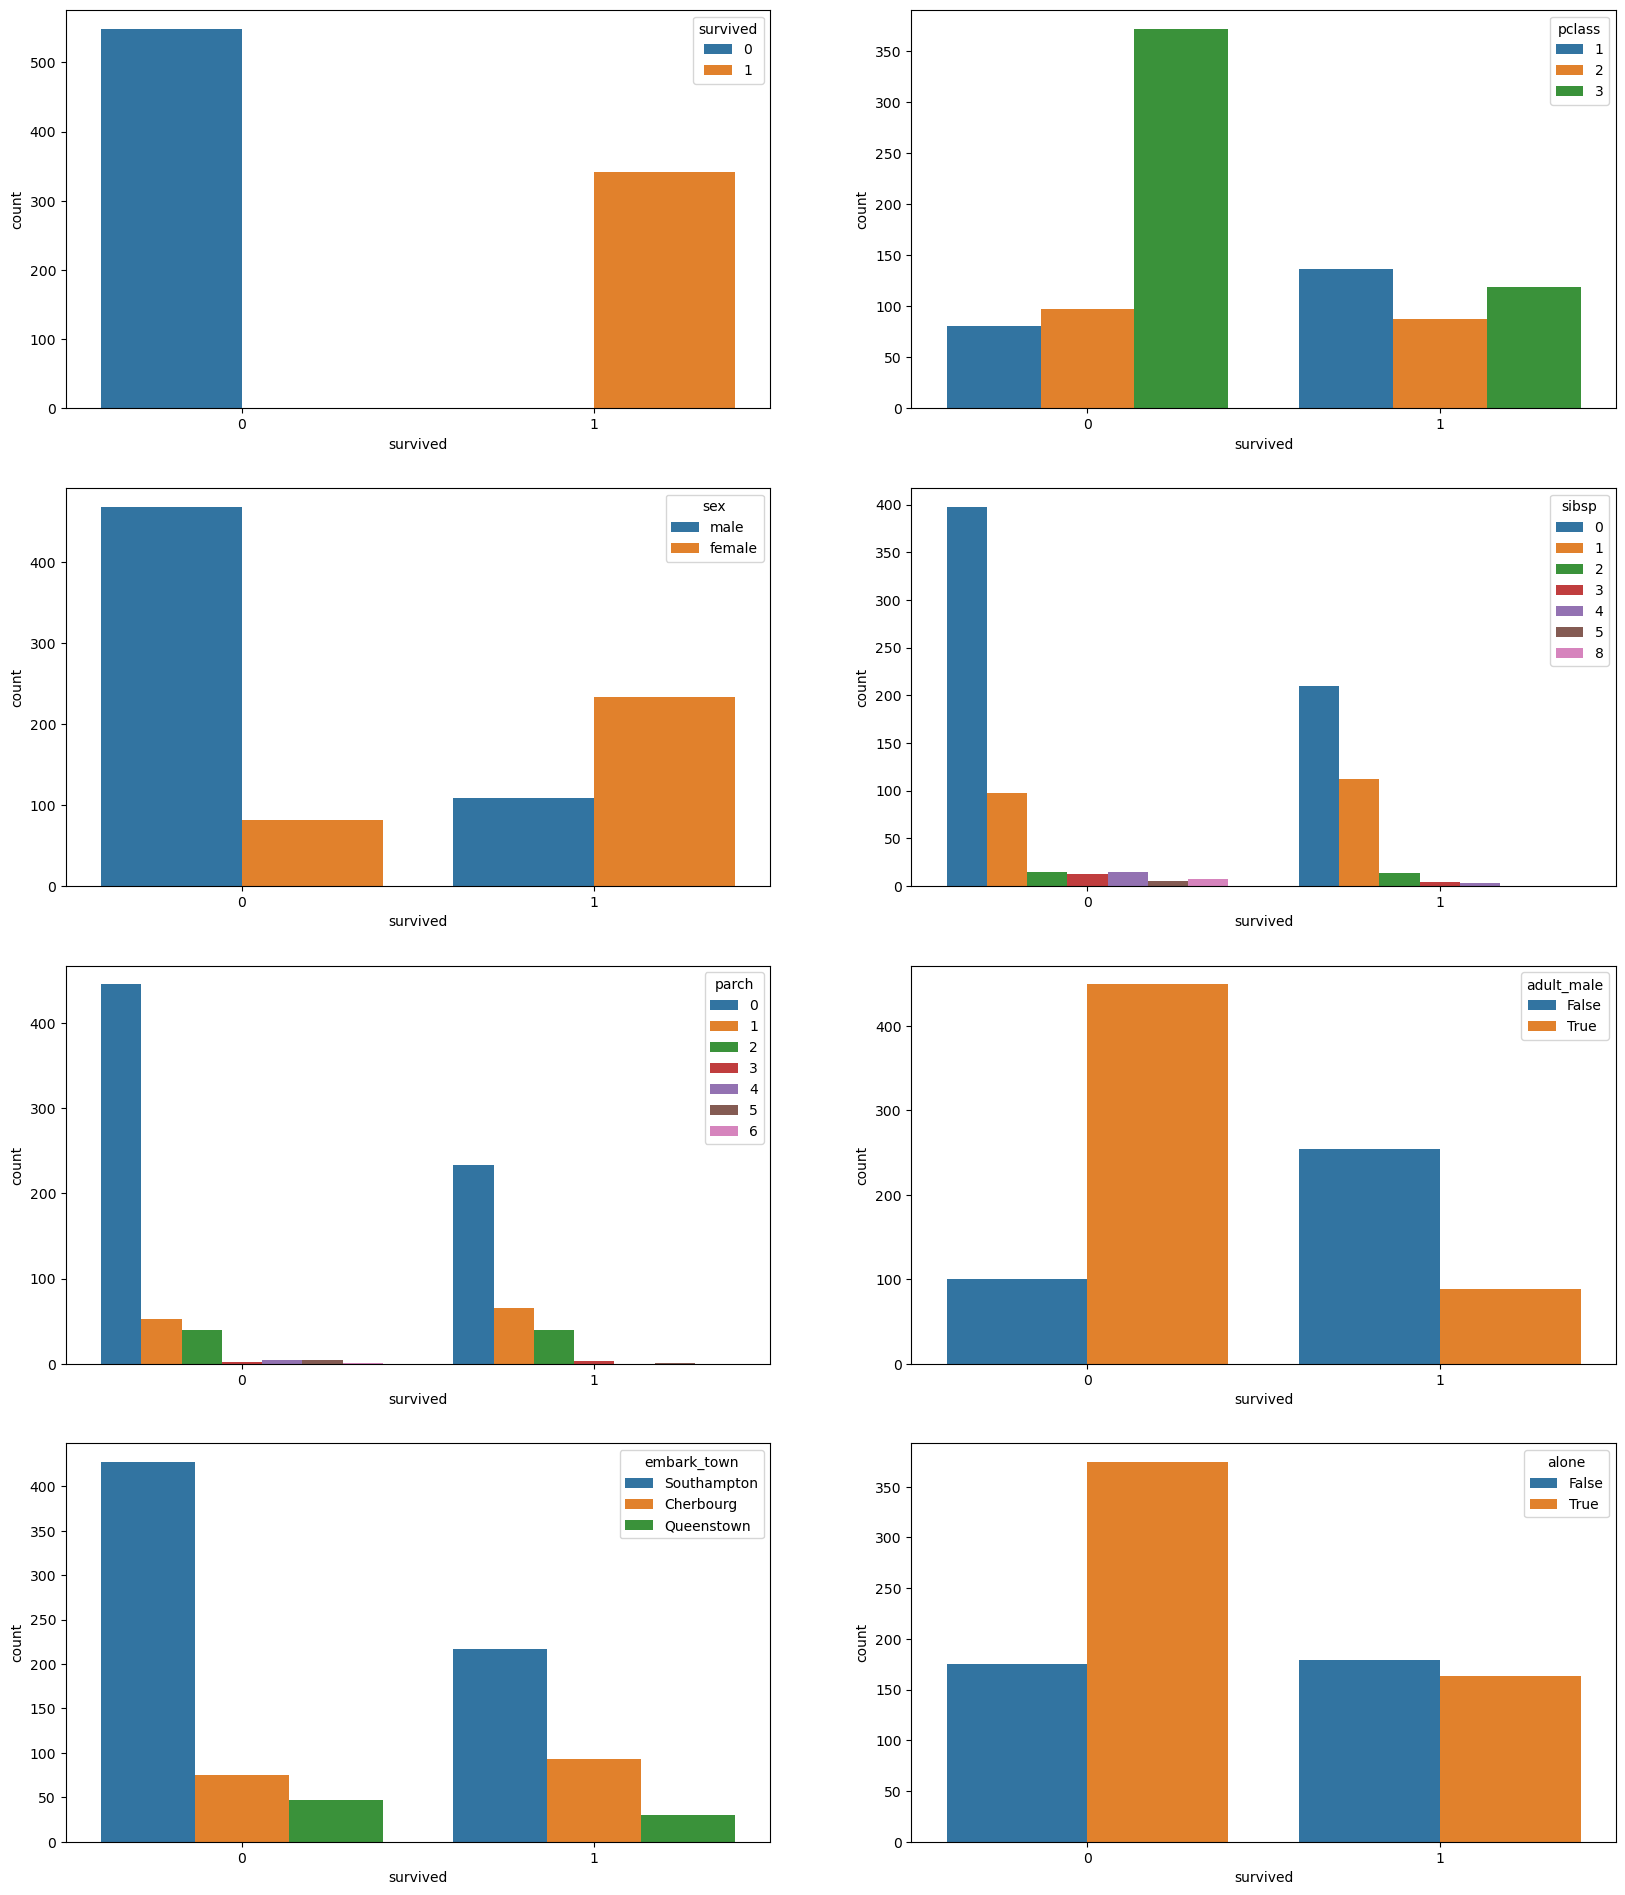

In [12]:
plt.figure(figsize=(20,30))

for i, col in zip(range(1, df.shape[1]), df.select_dtypes(exclude=float)):
    plt.subplot(5, 2, i)
    sns.countplot(x = 'survived', hue = col, data = df )
    

#despite having less passengers than the 3rd class, more passengers from the 1st class have survived
#the class seems to be a non-negligible factor

#the proportion male/female that have survived doesn't follow the same proportion of all the passengers
#the gender seems also to be a non-negligible parameter to the survival of a passenger

#the proportion of passengers having siblings/parents seems similar to the global population of the boat. 
#nonetheless it should be seen with further details

#the adult male population is less represented in the survivor group, whereas it was the majority of the boat
#population. It comes back to the likely importance of the gender, plus probably the importance of the age.

#where the survivors/non-survivors have embarked doesn't seem to differ from the original repartition over the
#whole boat population

#Compared to the original proportion, being alone is over represented among the non survivors, 
#and over represented among the survivors.

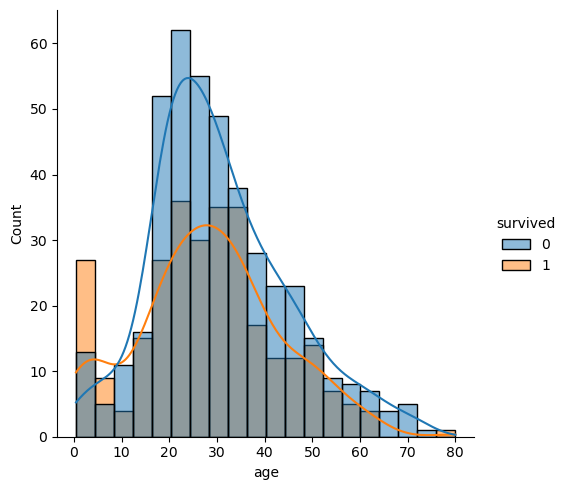

In [13]:
#age distribution between the survivor group and non-survivor group
sns.displot( x = df['age'], hue = df['survived'], kde=True)

#observing this distribution plot, the age doesn't seem to be a determinant factor.
#with the only exception being for the youngest children, who are more represented in the survivor group.

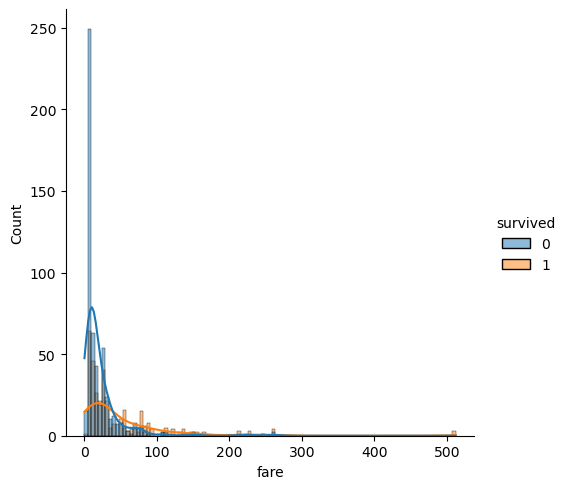

In [14]:
#fare distribution between the survivor group and non-survivor group
sns.displot( x = df['fare'], hue = df['survived'], kde=True)

#observing this distribution plot, the fare could be a determinant factor.
#the higher the fare, the more they are represented among the survivors.

### First Observations:

- Redondancy of some values, duplicate columns have been deleted
- Not a lot of missing data
- Unbalanced population for the target value 'survived'(less survivors than non-survivors)
- Most represented population on the boat :
    - Middle aged 
    - Men
    - travelling in 3rd Class 
    - travelling alone
    - Embarked in Southampton
- Some remarks among the survivor group:
    - 1st class is the most represented
    - Women represent the majority of the survivors
    - Around half of the survivors are now accompanied travellers
    - the more expensive the ticket is, the higher the survival rate seems to be
    - Adult Men are now clearly in minority
    - the age itself doesn't seem the be a significant factor, except for the younger children
    - the place of embarkation doesn't seem to be relevant
    
 
- is 'fare' relevant to work with ? does it provide different results than 'pclass' ?
- are 'parch' and 'sibsp' relevant ? do they provide different results than 'alone' ?  
- what are the key values to predict the survival of a passenger ?
 

#### Following step:  

# Data preprocessing

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


In [16]:
df.shape

(891, 10)

In [17]:
#missing data for 'age' and 'embark_town'
#I could decide to not use all the rows that have a missing value
#but since on the first observation, the age didn't seem to be a determinant factor (expect for youg children), 
#i will fill the NaN with the age mean

df['age'].fillna(df['age'].mean(), inplace = True)

#then delete the rest of the rows that have missing data (embark_town)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   adult_male   889 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 64.2+ KB


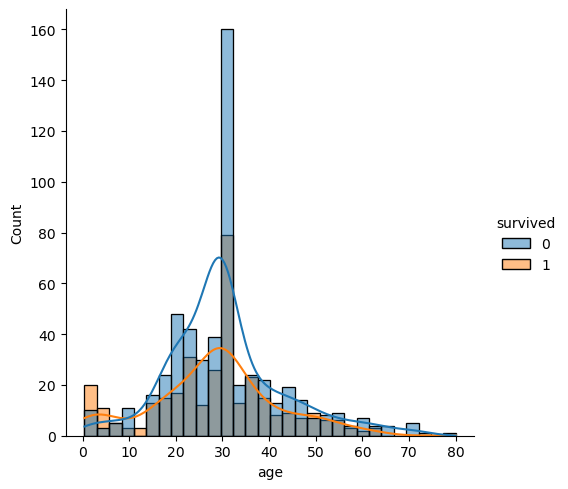

In [18]:
#is the age distribution still the same between survivors and non survivors ?
sns.displot( x = df['age'], hue = df['survived'], kde=True)

In [19]:
#the new age values and their ditribution are not far from what I had before the fillna, that is a good point
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [21]:
#now I will look into fare and pclass, do we need to keep both columns ?

#how many people survived per class
df_survivors = df['pclass'][df['survived'] == 1].value_counts()


print(df_survivors)

1    134
3    119
2     87
Name: pclass, dtype: int64


In [22]:
#sort the data with the ticket price, from the more expensive to the cheapest
sorted_df = df.sort_values(by = ['fare'], ascending = False).reset_index()
sorted_df.shape

(889, 11)

In [24]:
#I create 3 new categories but depending only on the price of the ticket
#I will then be able to see if there are differences with the representaion of the official classes of the boat
#among the survivors, and my classes based on the price only

sorted_df_tier1 = sorted_df.loc[0:296]
sorted_df_tier2 = sorted_df.loc[297:593]
sorted_df_tier3 = sorted_df.loc[594:889]

survivors_tier1 = sorted_df_tier1.value_counts(sorted_df_tier1['survived'] == 1)
survivors_tier2 = sorted_df_tier2.value_counts(sorted_df_tier2['survived'] == 1)
survivors_tier3 = sorted_df_tier3.value_counts(sorted_df_tier3['survived'] == 1)

print('Survivor count:\n')
print('TIER 1: ', survivors_tier1[1],'\n', 'Official 1st Class: ', df_survivors[1],'\n')
print('TIER 2: ', survivors_tier2[1],'\n', 'Official 2nd Class: ', df_survivors[2],'\n')
print('TIER 3: ', survivors_tier3[1],'\n', 'Official 3rd Class: ', df_survivors[3],'\n')

#The differences are significant
#My hypothesis is that the crew members are in this list and their ticket prices are at 0. 
#They might not have been the first to escape, to help other passengers, so that makes sense that my TIER 3 class
#is under represented among the survivors.

#Conclusion: pclass and fare give different informations, it seems relevant to keep them both.

Survivor count:

TIER 1:  166 
 Official 1st Class:  134 

TIER 2:  114 
 Official 2nd Class:  87 

TIER 3:  60 
 Official 3rd Class:  119 



In [25]:
#now I will look into sibsp, parch, and alone, do we need to keep those three columns ?

df['survived'][df['parch']==0].value_counts(normalize=True)

0    0.658284
1    0.341716
Name: survived, dtype: float64

In [26]:
df['survived'][df['sibsp']==0].value_counts(normalize=True)

0    0.656766
1    0.343234
Name: survived, dtype: float64

In [27]:
df['survived'][df['alone']== True].value_counts(normalize=True)

0    0.699065
1    0.300935
Name: survived, dtype: float64

In [28]:
df['survived'][(df['parch']!=0)&(df['sibsp']!=0)].value_counts(normalize=True)

0    0.56338
1    0.43662
Name: survived, dtype: float64

In [29]:
#The survival rate goes from 30% if your alone, to 34% if you have siblings OR parents,
#to 43% if you have siblings AND parents

#I will add a new column for passengers that have siblings AND parents because the survival rate is significantly 
#higher for them. And then delete the sibsp and the parch columns that are to close to the alone column

sib_par = []

for sib, par in zip(df['sibsp'], df['parch']):
    if (sib > 0) & (par > 0):
        sib_par.append(1)
    else:
        sib_par.append(0)

df['sib_and_par'] = sib_par
df = df.drop(['sibsp', 'parch'], axis = 1)
df.head()

,survived,pclass,sex,age,fare,adult_male,embark_town,alone,sib_and_par
0,0,3,male,22.0,7.2500,True,Southampton,False,0
1,1,1,female,38.0,71.2833,False,Cherbourg,False,0
2,1,3,female,26.0,7.9250,False,Southampton,True,0
3,1,1,female,35.0,53.1000,False,Southampton,False,0
4,0,3,male,35.0,8.0500,True,Southampton,True,0


In [30]:
#does the embark town has an impact on chance of survival ?


#proportion of the embark town among the whole boat population
df['embark_town'].value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

In [37]:
#proportion of the embark town among the survivors
df['embark_town'][df['survived'] == 1].value_counts(normalize=True)



#passengers who embarked from Cherbourg seem to have higher survival rates.
#but maybe it is correlated to another value, for exemple more people from Cherbourg travelled in 1st class.

Southampton    0.638235
Cherbourg      0.273529
Queenstown     0.088235
Name: embark_town, dtype: float64

In [39]:
df['embark_town'][df['pclass'] == 1].value_counts(normalize=True)
#it confirms my hypothesis.
#People from Cherbourg were more represented in the 1st class, than on the whole boat.
#So, they were more likely to travel in 1st class.

Southampton    0.593458
Cherbourg      0.397196
Queenstown     0.009346
Name: embark_town, dtype: float64

In [46]:
#We could check that also by observing the average ticket amount, depending on the embark town

for town in df['embark_town'].unique():
    price = df['fare'][df['embark_town'] == town].mean()
    print(f'Passengers from {town} paid in average {round(price,2)}$ for their ticket.')

#The average ticket price is significantly higher for the passengers from Cherbourg.

Passengers from Southampton paid in average 27.08$ for their ticket.
Passengers from Cherbourg paid in average 59.95$ for their ticket.
Passengers from Queenstown paid in average 13.28$ for their ticket.


In [48]:
#Knowning that we still have the fare values and the class values, I can delete the 'embark_town' column, 
#as it is not a significant factor in itself, it is just correlated with the class and the ticket price.

df = df.drop('embark_town', axis = 1)
df.head()

,survived,pclass,sex,age,fare,adult_male,alone,sib_and_par
0,0,3,male,22.0,7.2500,True,False,0
1,1,1,female,38.0,71.2833,False,False,0
2,1,3,female,26.0,7.9250,False,True,0
3,1,1,female,35.0,53.1000,False,False,0
4,0,3,male,35.0,8.0500,True,True,0


In [50]:
#encoding the sex column

df['sex'].replace({'female':0, 'male':1}, inplace = True)
df.head()

,survived,pclass,sex,age,fare,adult_male,alone,sib_and_par
0,0,3,1,22.0,7.2500,True,False,0
1,1,1,0,38.0,71.2833,False,False,0
2,1,3,0,26.0,7.9250,False,True,0
3,1,1,0,35.0,53.1000,False,False,0
4,0,3,1,35.0,8.0500,True,True,0


### End of Data Cleaning

##  Train / Validation / Test sets

In [53]:
from sklearn.model_selection import train_test_split

In [69]:
seed = 0

X = df.drop('survived', axis = 1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed, stratify=y_test)

y_train.value_counts(normalize = True)
#As we observed on the first part, the results are unbalanced.

0    0.617363
1    0.382637
Name: survived, dtype: float64

In [70]:
#over sampling the train set so the survivor and non survivor populations are balanced.

from sklearn.utils import resample

In [83]:
df_temp = X_train
df_temp['survived'] = y_train

#i will oversample the survivor population
survivors = df_temp[df_temp['survived'] == 1]
non_survivors = df_temp[df_temp['survived'] == 0]

survivors_resampled = resample(survivors, replace=True, n_samples=len(non_survivors))

In [84]:
non_survivors.shape

(384, 8)

In [85]:
survivors_resampled.shape

(384, 8)

In [88]:
df_temp = pd.concat([non_survivors, survivors_resampled], axis = 0)
df_temp['survived'].value_counts(normalize=True)
#The 2 populations are now equal

0    0.5
1    0.5
Name: survived, dtype: float64

In [90]:
X_train_final = df_temp.drop(['survived'], axis = 1)
y_train_final = df_temp['survived']

## Machine Learning Modeling

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

In [142]:
def evaluation(model):
    model.fit(X_train_final, y_train_final)
    pred = model.predict(X_val)
    
    print(confusion_matrix(y_val, pred))
    print(classification_report(y_val, pred))
    
    N, train_score, val_score = learning_curve(model, X_train_final, y_train_final, cv=4)
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label = 'train score')
    plt.plot(N, val_score.mean(axis=1), label = 'validation score')
    plt.legend()

[[75  7]
 [13 38]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        82
           1       0.84      0.75      0.79        51

    accuracy                           0.85       133
   macro avg       0.85      0.83      0.84       133
weighted avg       0.85      0.85      0.85       133



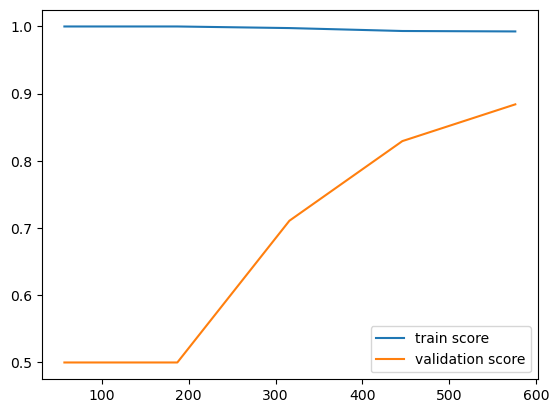

In [143]:
r_forest = RandomForestClassifier(random_state=seed)
evaluation(r_forest)

In [150]:
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression(random_state=seed)

[[67 15]
 [ 9 42]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        82
           1       0.74      0.82      0.78        51

    accuracy                           0.82       133
   macro avg       0.81      0.82      0.81       133
weighted avg       0.83      0.82      0.82       133



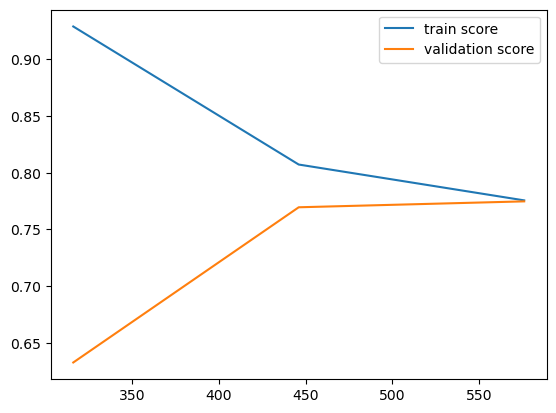

In [145]:
evaluation(log_regression)

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
k_neighbor = KNeighborsClassifier()

[[61 21]
 [21 30]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        82
           1       0.59      0.59      0.59        51

    accuracy                           0.68       133
   macro avg       0.67      0.67      0.67       133
weighted avg       0.68      0.68      0.68       133



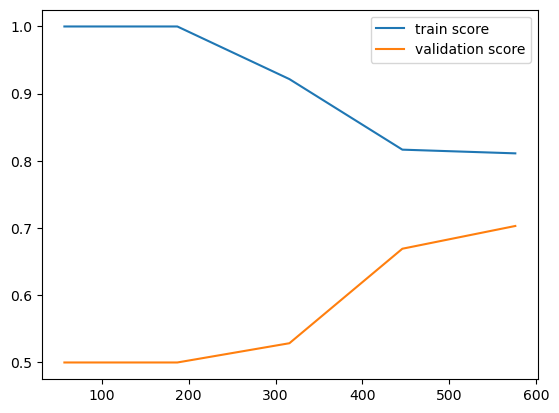

In [149]:
evaluation(k_neighbor)

In [155]:
from sklearn.svm import SVC

In [156]:
sv = SVC(random_state=seed)

[[63 19]
 [23 28]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        82
           1       0.60      0.55      0.57        51

    accuracy                           0.68       133
   macro avg       0.66      0.66      0.66       133
weighted avg       0.68      0.68      0.68       133



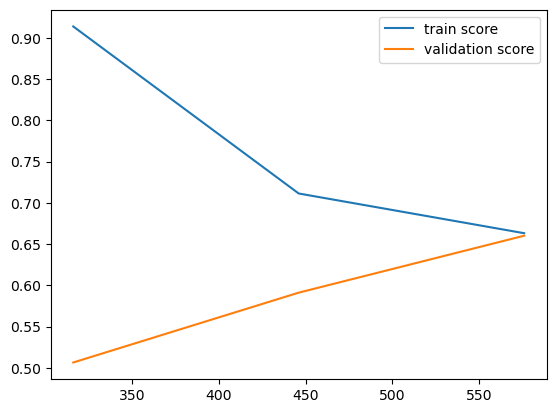

In [157]:
evaluation(sv)

## Improving the Random Forest Model

In [153]:
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy_score

r_forest = RandomForestClassifier(random_state=seed)

rf_hyp_par = {'n_estimators':[5,10,20,50,100,200],
             'max_depth': [None, 2, 5, 10, 15, 20]}

rf_cv = GridSearchCV(r_forest, rf_hyp_par, cv = 5)

In [154]:
rf_cv.fit(X_train_final, y_train_final)

print(rf_cv.best_score_)
print(rf_cv.best_estimator_)

0.8880230880230879
RandomForestClassifier(n_estimators=20, random_state=0)
